In [25]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

learning_rage = 0.001
training_epochs = 20
batch_size = 100

#dataloader
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train = True,
                          transform = transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root = 'MNIST_data/',
                          train = False,
                          transform = transforms.ToTensor(),
                          download=True)

data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size =batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [26]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.keep_prob = 0.5
        #L1 image in shape = (?,28,28,1)
        #    conv -> (?, 28, 28, 6)
        #    pool -> (?, 14, 14, 6)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2)
        )

        #L2 image in shape = (?, 14,14,6)
        #   conv -> (?,10,10,16)
        #   pool -> (?,5,5,16)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(6, 16 , kernel_size=5 ,stride=1, padding=0),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2,stride=2)
        )

        #Fully connected Layer 5*5*16
        self.fc1 = torch.nn.Linear(5*5*16, 120, bias=True)
        torch.nn.init.xavier_uniform(self.fc1.weight)
        self.layer3 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU()
            #,torch.nn.Dropout(p=1-self.keep_prob)
        )
        #Fully connected Layer 120->84
        self.fc2 = torch.nn.Linear(120, 84, bias=True)
        torch.nn.init.xavier_uniform(self.fc2.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc2,
            torch.nn.ReLU()
        )
        self.fc3 = torch.nn.Linear(84, 10, bias=True)
        torch.nn.init.xavier_uniform(self.fc3.weight)

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.fc3(out)
        return out

In [27]:
#
model = CNN().to(device)

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rage)

total_batch = len(data_loader)
print("total batch  ", total_batch)


for epoch in range(training_epochs):
    avg_cost = 0
    true_count = 0

    for X, Y in data_loader:
        X=X.to(device)
        Y=Y.to(device)

        optimizer.zero_grad()
        hypothesys = model(X)
        cost = criterion(hypothesys, Y)
        cost.backward()
        optimizer.step()
        correct_prediction = torch.argmax(hypothesys, dim = 1) ==Y
        true_count += correct_prediction.float().sum()

        avg_cost += cost / total_batch

    print("epoch {:>4} cost={:>.9f} accuracy={:>.9f}, true={}".format(
        epoch+1, avg_cost, true_count/total_batch, true_count))

#torch.save(model, "model/model_epoch20.m")

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3476/1540506848.py:25: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc1.weight)
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3476/1540506848.py:33: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc2.weight)
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_3476/1540506848.py:39: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(self.fc3.weight)


total batch   600
epoch    1 cost=0.261522204 accuracy=92.349998474, true=55410.0
epoch    2 cost=0.074405834 accuracy=97.651672363, true=58591.0
epoch    3 cost=0.052444506 accuracy=98.391670227, true=59035.0
epoch    4 cost=0.041057270 accuracy=98.740005493, true=59244.0
epoch    5 cost=0.035066403 accuracy=98.925003052, true=59355.0
epoch    6 cost=0.027447848 accuracy=99.126670837, true=59476.0
epoch    7 cost=0.024601921 accuracy=99.205001831, true=59523.0
epoch    8 cost=0.020981353 accuracy=99.340003967, true=59604.0
epoch    9 cost=0.018092178 accuracy=99.425003052, true=59655.0
epoch   10 cost=0.015668722 accuracy=99.463333130, true=59678.0
epoch   11 cost=0.012182700 accuracy=99.591667175, true=59755.0
epoch   12 cost=0.011482378 accuracy=99.648338318, true=59789.0
epoch   13 cost=0.009997138 accuracy=99.646667480, true=59788.0
epoch   14 cost=0.011586642 accuracy=99.620002747, true=59772.0
epoch   15 cost=0.008573513 accuracy=99.700004578, true=59820.0
epoch   16 cost=0.0066

Accuracy :  0.9890999794006348
1) Label=9, Prediction=9 


C:\anaconda3\envs\pytorch04\lib\site-packages\torchvision\datasets\mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\anaconda3\envs\pytorch04\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


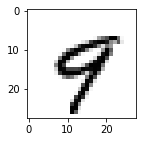

2) Label=1, Prediction=1 


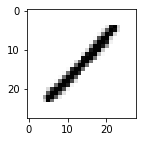

3) Label=1, Prediction=1 


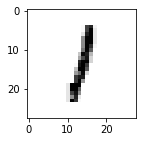

4) Label=3, Prediction=3 


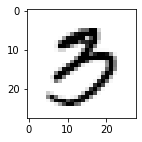

5) Label=7, Prediction=7 


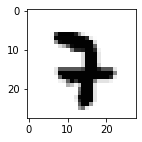

160) Label=4, Prediction=8 


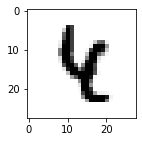

247) Label=4, Prediction=2 


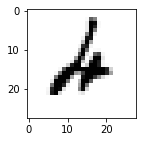

321) Label=2, Prediction=7 


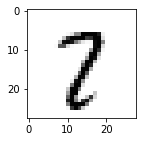

435) Label=8, Prediction=9 


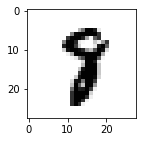

445) Label=6, Prediction=0 


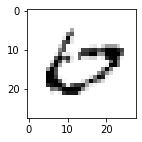

551) Label=7, Prediction=9 


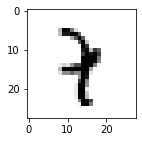

582) Label=8, Prediction=2 


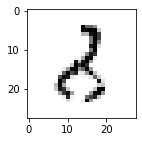

583) Label=2, Prediction=7 


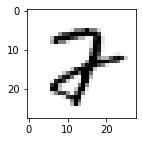

625) Label=6, Prediction=4 


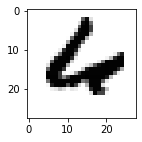

659) Label=2, Prediction=7 


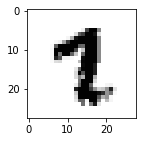

674) Label=5, Prediction=3 


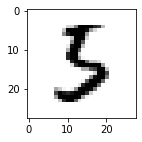

716) Label=1, Prediction=7 


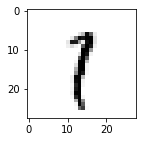

726) Label=7, Prediction=4 


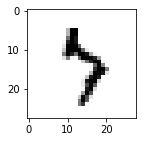

774) Label=4, Prediction=9 


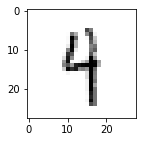

844) Label=8, Prediction=7 


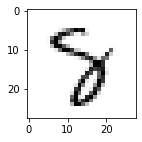

881) Label=4, Prediction=9 


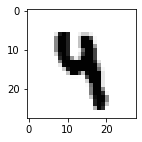

924) Label=2, Prediction=7 


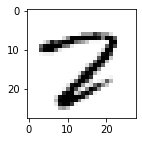

938) Label=3, Prediction=5 


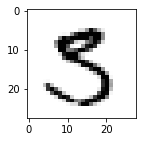

947) Label=8, Prediction=9 


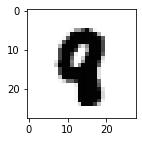

1014) Label=6, Prediction=9 


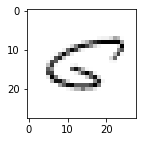

1039) Label=7, Prediction=1 


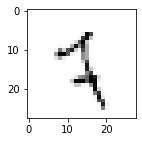

1112) Label=4, Prediction=6 


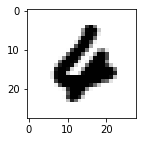

1226) Label=7, Prediction=2 


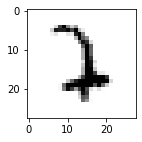

1242) Label=4, Prediction=9 


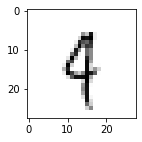

1260) Label=7, Prediction=1 


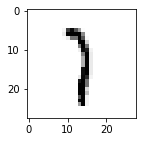

1263) Label=4, Prediction=9 


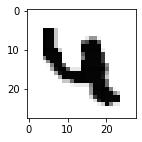

1319) Label=8, Prediction=0 


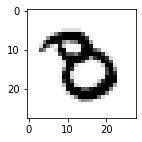

1393) Label=5, Prediction=3 


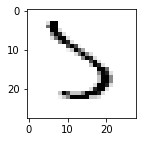

1414) Label=9, Prediction=7 


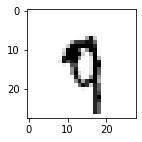

1522) Label=7, Prediction=8 


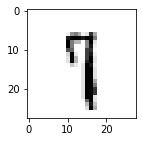

1530) Label=8, Prediction=7 


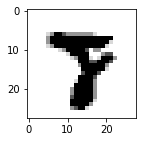

1559) Label=9, Prediction=3 


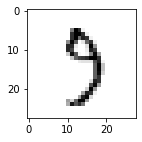

1621) Label=0, Prediction=6 


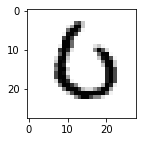

1878) Label=8, Prediction=3 


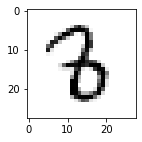

1883) Label=7, Prediction=9 


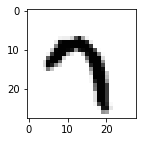

1901) Label=9, Prediction=4 


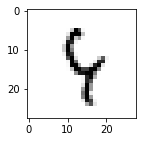

1982) Label=6, Prediction=5 


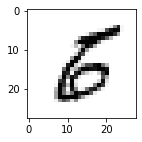

2035) Label=5, Prediction=3 


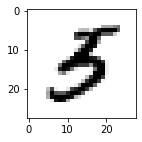

2129) Label=9, Prediction=2 


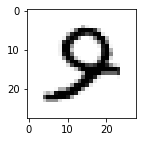

2130) Label=4, Prediction=9 


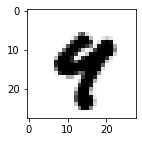

2135) Label=6, Prediction=1 


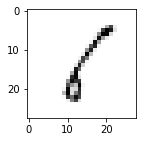

2185) Label=0, Prediction=8 


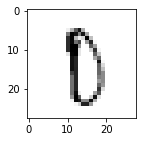

2195) Label=7, Prediction=2 


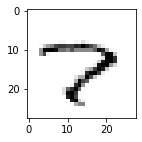

2369) Label=5, Prediction=3 


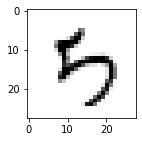

2447) Label=4, Prediction=9 


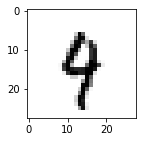

2582) Label=9, Prediction=7 


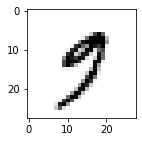

2597) Label=5, Prediction=3 


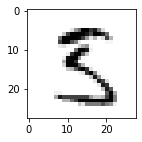

2630) Label=4, Prediction=9 


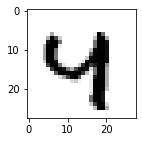

2654) Label=6, Prediction=1 


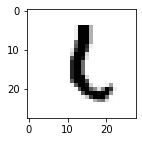

2810) Label=5, Prediction=3 


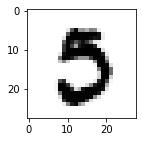

2896) Label=8, Prediction=0 


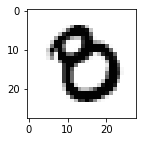

2921) Label=3, Prediction=8 


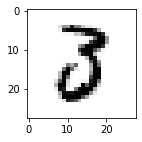

2938) Label=4, Prediction=9 


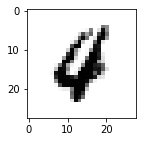

2953) Label=3, Prediction=5 


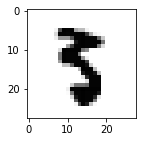

2959) Label=2, Prediction=3 


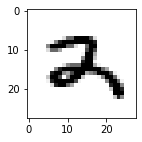

3225) Label=7, Prediction=9 


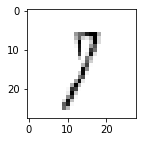

3288) Label=4, Prediction=9 


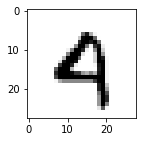

3289) Label=8, Prediction=9 


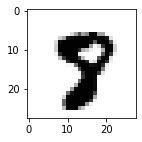

3503) Label=9, Prediction=8 


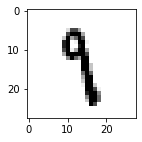

3520) Label=6, Prediction=4 


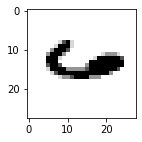

3534) Label=4, Prediction=8 


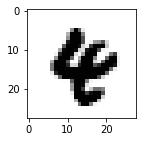

3558) Label=5, Prediction=0 


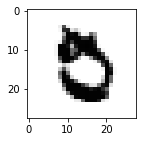

3727) Label=8, Prediction=9 


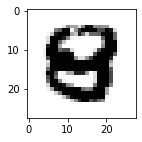

3762) Label=6, Prediction=8 


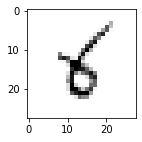

3767) Label=7, Prediction=2 


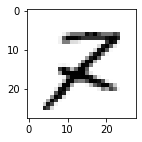

3780) Label=4, Prediction=6 


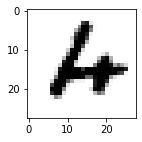

3808) Label=7, Prediction=8 


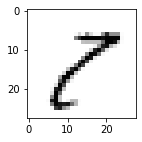

4176) Label=2, Prediction=7 


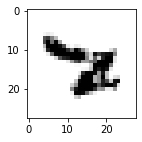

4265) Label=4, Prediction=7 


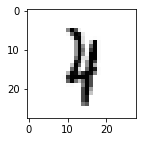

4497) Label=8, Prediction=2 


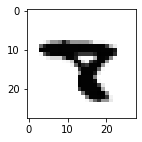

4504) Label=2, Prediction=7 


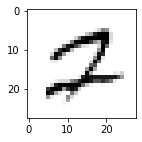

4507) Label=1, Prediction=8 


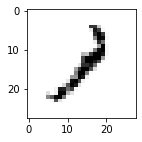

4578) Label=7, Prediction=9 


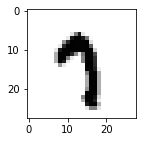

4712) Label=5, Prediction=9 


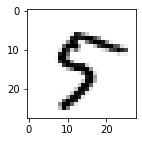

4740) Label=3, Prediction=5 


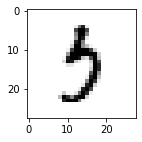

4761) Label=9, Prediction=8 


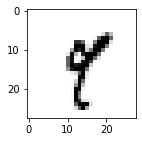

4783) Label=4, Prediction=9 


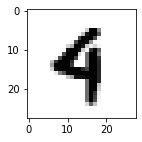

4823) Label=9, Prediction=4 


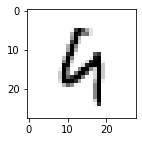

4838) Label=6, Prediction=5 


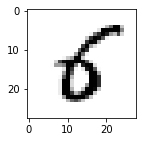

4860) Label=4, Prediction=9 


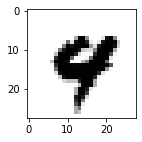

4880) Label=0, Prediction=9 


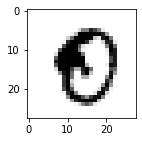

4911) Label=4, Prediction=9 


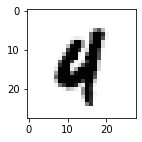

5201) Label=4, Prediction=9 


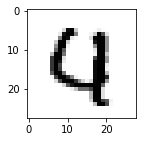

5655) Label=7, Prediction=3 


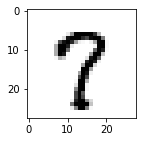

5937) Label=5, Prediction=3 


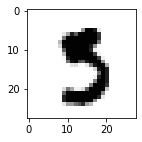

5955) Label=3, Prediction=8 


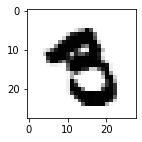

5997) Label=5, Prediction=9 


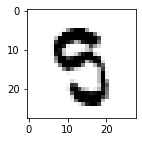

6173) Label=9, Prediction=2 


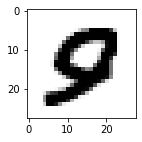

6532) Label=0, Prediction=7 


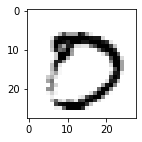

6555) Label=8, Prediction=9 


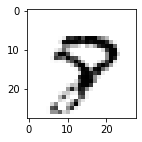

6571) Label=9, Prediction=7 


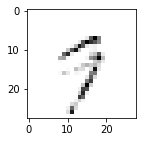

6597) Label=0, Prediction=7 


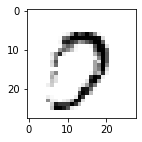

6783) Label=1, Prediction=6 


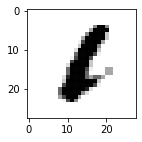

7472) Label=2, Prediction=7 


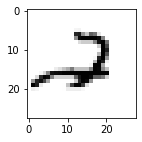

7574) Label=4, Prediction=1 


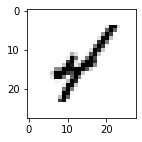

8061) Label=4, Prediction=9 


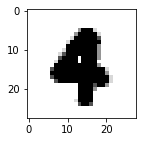

8406) Label=4, Prediction=9 


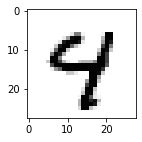

8408) Label=8, Prediction=5 


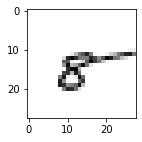

9009) Label=7, Prediction=2 


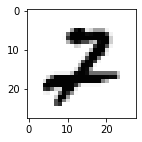

9015) Label=7, Prediction=2 


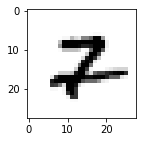

9634) Label=0, Prediction=8 


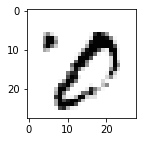

9642) Label=9, Prediction=7 


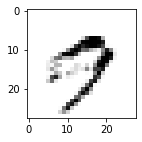

9664) Label=2, Prediction=7 


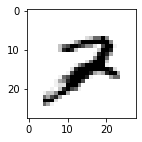

9679) Label=6, Prediction=3 


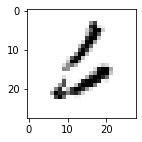

9692) Label=9, Prediction=7 


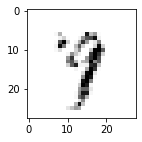

9729) Label=5, Prediction=6 


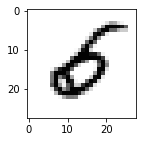

9792) Label=4, Prediction=9 


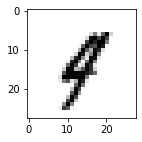

9839) Label=2, Prediction=3 


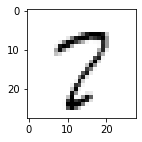

9858) Label=6, Prediction=8 


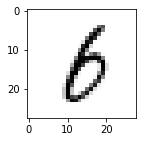

In [50]:
import matplotlib.pyplot as plt
import random
model = torch.load( "model/model_epoch20.m")
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, dim = 1) ==Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy : ", accuracy.item())

    for count in range(5):
        #MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
        r = random.randint(0, len(mnist_test)- 1)
        X_single_data = mnist_test.test_data[r:r+1].view(-1,1,28,28).float().to(device)
        #print(X_single_data.dim())
        Y_single_data = mnist_test.test_labels[r:r+1].to(device)
        single_prediction = model(X_single_data)
        print('{}) Label={}, Prediction={} '.format(count+1,
            Y_single_data.item(), torch.argmax(single_prediction, dim=1).item()))
        plt.figure(figsize = (2,2))
        plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',interpolation='nearest')
        plt.show()

    for i, f_item in enumerate(correct_prediction):
        if not f_item and i < (len(mnist_test)- 2):
            X_data = mnist_test.test_data[i:i+1].view(-1,1,28,28).float().to(device)
            Y_data = mnist_test.test_labels[i:i+1].to(device)
            F_prediction = model(X_data)
            print('{}) Label={}, Prediction={} '.format(i,
                                       Y_data.item(), torch.argmax(F_prediction, dim=1).item()))
            plt.figure(figsize = (2,2))
            plt.imshow(mnist_test.test_data[i:i+1].view(28,28), cmap='Greys',interpolation='nearest')
            plt.show()


4
Label 4
Prediction:  4


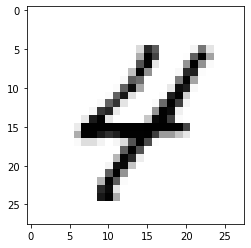

In [39]:

import matplotlib.pyplot as plt
import random

#MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
r = random.randint(0, len(mnist_test)- 1)
X_single_data = mnist_test.test_data[r:r+1].view(-1,1,28,28).float().to(device)
print(X_single_data.dim())
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print('Label', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',interpolation='nearest')
plt.show()